In [1]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# acquire
from env import host, user, password
from pydataset import data
import acquire
import prepare
from scipy import stats
from sklearn.model_selection import train_test_split


In [2]:
# use a python module (pydata or seaborn datasets) containing datasets as a 
# source from the iris data. Create a pandas dataframe, df_iris, from this data.
df_iris = data('iris')

In [3]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns
df_iris.shape

(150, 5)

In [5]:
# print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# print the summary statistics for each of the numeric variables. Would 
# you recommend rescaling the data based on these statistics
df_iris.describe()   # .T can be used to transpose columns and rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [9]:
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_type,internet_service,internet_type,contract_type,...,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,Start_Date,average_monthly_charges,Match,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,True,False,True,True,True,3,2020-08-13,65.9222,No Match,Phone + Internet
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,False,False,True,True,True,0,2020-08-13,60.2667,No Match,Phone + Internet
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,False,True,True,True,True,0,2021-01-13,70.2125,No Match,Phone + Internet


In [10]:
# assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel.head(100)

In [11]:
df_excel_sample.shape

(100, 26)

In [12]:
# print the number of rows of your original dataframe

df_excel.shape[0]

7049

In [13]:
# print the first 5 column names

df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [14]:
# print the column names that have a data type of object

list(df_excel.select_dtypes(['object']).columns)

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_type',
 'internet_type',
 'contract_length',
 'payment_type',
 'churn',
 'average_monthly_charges',
 'Match',
 'service_type']

In [15]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,Tenure,partner_dependents
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.374805,1.083416
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.596637,1.226883
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,9.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,29.000000,1.000000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.000000,3.000000


In [16]:
# compute the range for each of the numeric variables.

df_excel.select_dtypes(['int64', 'float64']).max() - df_excel.select_dtypes(['int64', 'float64']).min()

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_type            2.0
monthly_charges        100.5
total_charges         8666.0
Tenure                  79.0
partner_dependents       3.0
dtype: float64

### 3. Read the data from this google sheet into a dataframe, df_google

In [17]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)

In [18]:
# print the first 3 rows

df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
# print the number of rows and columns

df_googlesheet.shape

(891, 12)

In [20]:
# print the column names

df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
# print the summary statistics for each of the numeric variables

df_googlesheet.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                     

In [23]:
# print the unique values for each of your categorical variables

df_googlesheet.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [24]:
df_googlesheet.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [25]:
df_googlesheet.Pclass.value_counts(dropna=False)


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df_googlesheet.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df_googlesheet.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [28]:
# Preparing for Prepare
# bring in titanic and iris data

In [29]:
from acquire import get_connection, get_new_titanic_data, get_titanic_data, new_iris_data, get_iris_data

In [30]:
df = get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [31]:
df = get_titanic_data(cached=True)
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [32]:
iris_df = get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### Data Preparation Exercises

#### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

#### This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

#### 1. Use the function defined in acquire.py to load the iris data.

In [33]:
iris_df.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


#### 2. Drop the species_id and measurement_id columns.

In [34]:
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])

In [35]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


#### 3. Rename the species_name column to just species.

In [36]:
iris_df = iris_df.rename(columns={'species_name': 'species'})

In [37]:
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### 4. Create dummy variables of the species name.

In [39]:
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True])

In [40]:
# concat dummy_df with my df
iris_df = pd.concat([iris_df,dummy_df], axis = 1)

In [41]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0


#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [42]:
iris_df = acquire.get_iris_data()

In [43]:
def prep_iris(iris_df):
    '''
    takes in a df of the iris dataset as it is acquired and returns a cleaned df
    arguements: df: a pandas df with the expected feature names and columns return: 
    clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns = ['species_id'])
    df = df.rename(columns={"species_name": "species"})
    dummy_species_name = pd.get_dummies(df[['species']]) 
    return df

In [44]:
# then for the py file, copy and paste the functions
# copy and paste docuscript from the lesson and change 
#titanic to iris

### Exploratory Analysis

 - Using Iris data from our mySql server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data

In [51]:
#this data has both tables in it (measure and species with a join)
iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [52]:
iris.columns

Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')

In [53]:
#drop columns that are not needed
iris=iris.drop(columns=['species_id', 'measurement_id'])

In [54]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [55]:
#split data using sklearn import

train_and_validate, test = train_test_split(iris,test_size=.15,random_state=123)

train, validate = train_test_split(train_and_validate,test_size=.15,random_state=123)

In [56]:
iris.shape

(150, 5)

In [57]:
#this is the size of the train data set
train.shape, train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 67 to 109
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  107 non-null    float64
 1   sepal_width   107 non-null    float64
 2   petal_length  107 non-null    float64
 3   petal_width   107 non-null    float64
 4   species_name  107 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.0+ KB


((107, 5), None)

In [58]:
train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species_name
67,5.8,2.7,4.1,1.0,versicolor
105,7.6,3.0,6.6,2.1,virginica
91,6.1,3.0,4.6,1.4,versicolor


In [59]:
#this is the size of the validate data set
validate.shape, validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 121 to 6
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  20 non-null     float64
 1   sepal_width   20 non-null     float64
 2   petal_length  20 non-null     float64
 3   petal_width   20 non-null     float64
 4   species_name  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


((20, 5), None)

In [60]:
#this is the size of the test data set
test.shape, test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 72 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  23 non-null     float64
 1   sepal_width   23 non-null     float64
 2   petal_length  23 non-null     float64
 3   petal_width   23 non-null     float64
 4   species_name  23 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


((23, 5), None)

In [61]:
#melt
melt = train.melt(id_vars='species_name')
melt

,species_name,variable,value
0,versicolor,sepal_length,5.8
1,virginica,sepal_length,7.6
2,versicolor,sepal_length,6.1
3,versicolor,sepal_length,7.0
4,versicolor,sepal_length,5.1
...,...,...,...
423,virginica,petal_width,1.8
424,versicolor,petal_width,1.3
425,versicolor,petal_width,1.8
426,versicolor,petal_width,1.5


In [62]:
# def train_validate_test_split(df, target, seed=123):
#     '''
#     This function takes in a dataframe, the name of the target variable
#     (for stratification purposes), and an integer for a setting a seed
#     and splits the data into train, validate and test. 
#     Test is 20% of the original dataset, validate is .30*.80= 24% of the 
#     original dataset, and train is .70*.80= 56% of the original dataset. 
#     The function returns, in this order, train, validate and test dataframes. 
#     '''
#     train_validate, test = train_test_split(df, test_size=0.2, 
#                                             random_state=seed, 
#                                             stratify=df[target])
#     train, validate = train_test_split(train_validate, test_size=0.3, 
#                                        random_state=seed,
#                                        stratify=train_validate[target])
#     return train, validate, test

#### 2. Univariate Statsia
2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [63]:
plt.rc('font', size=14) 
plt.rc('figure', figsize=(14,7))

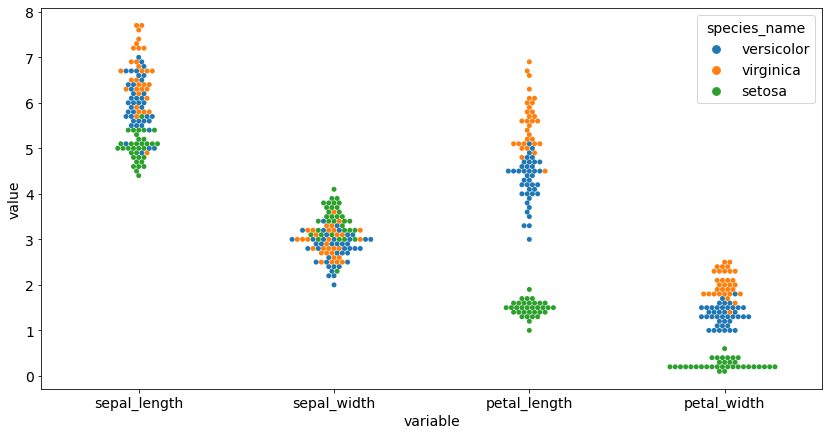

In [64]:
sns.swarmplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

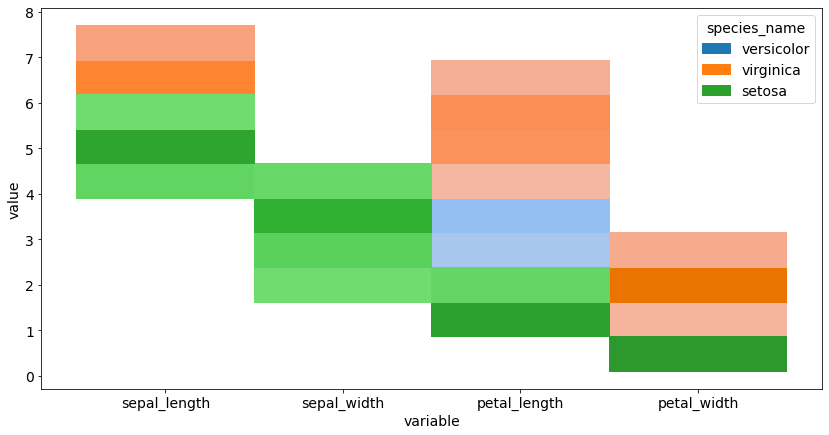

In [65]:
sns.histplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

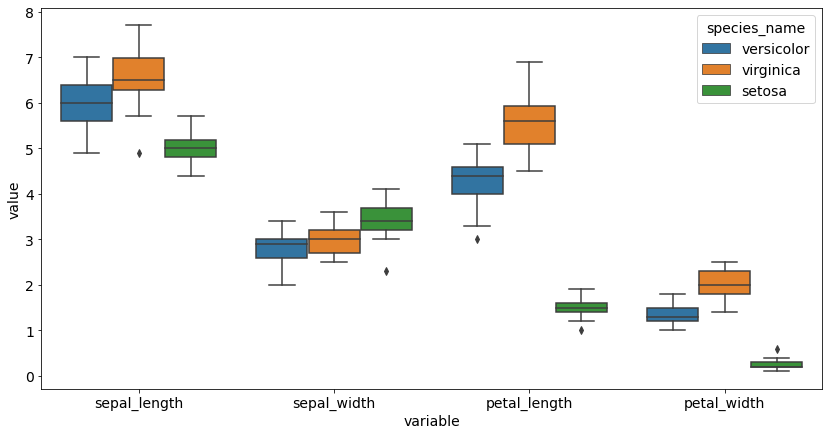

In [66]:
sns.boxplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

In [67]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,107.000000,107.000000,107.000000,107.000000
mean,5.845794,3.038318,3.774766,1.199065
std,0.804384,0.417234,1.717012,0.738496
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.350000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.100000,6.900000,2.500000


- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [69]:
#frequency table
train.value_counts().head()

sepal_length  sepal_width  petal_length  petal_width  species_name
5.8           2.7          5.1           1.9          virginica       2
7.7           2.8          6.7           2.0          virginica       1
5.4           3.9          1.7           0.4          setosa          1
5.1           3.8          1.6           0.2          setosa          1
                           1.9           0.4          setosa          1
dtype: int64

In [70]:
# takeaways
train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.161847,0.873929,0.806201
sepal_width,-0.161847,1.000000,-0.447030,-0.378925
petal_length,0.873929,-0.447030,1.000000,0.958996
petal_width,0.806201,-0.378925,0.958996,1.000000


<AxesSubplot:xlabel='species_name'>

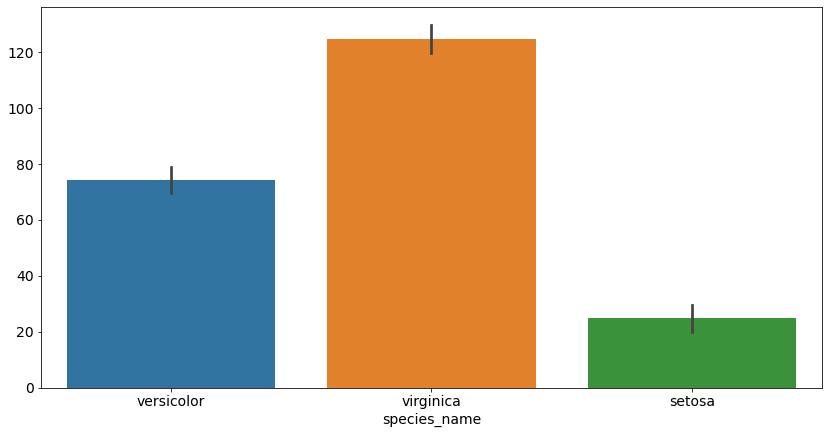

In [71]:
sns.barplot(x=train.species_name, y=train.index)

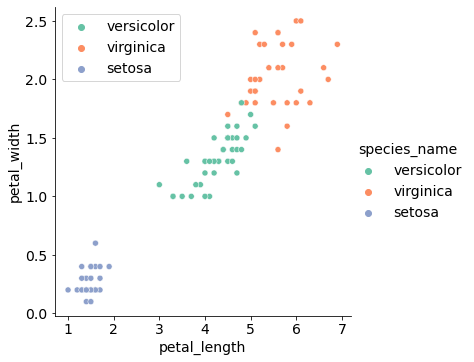

In [72]:
#the table above shows that there is greatest correlation between petal length and petal width
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species_name', palette='Set2')
plt.legend()
plt.show()

### Bivariate Stats
3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

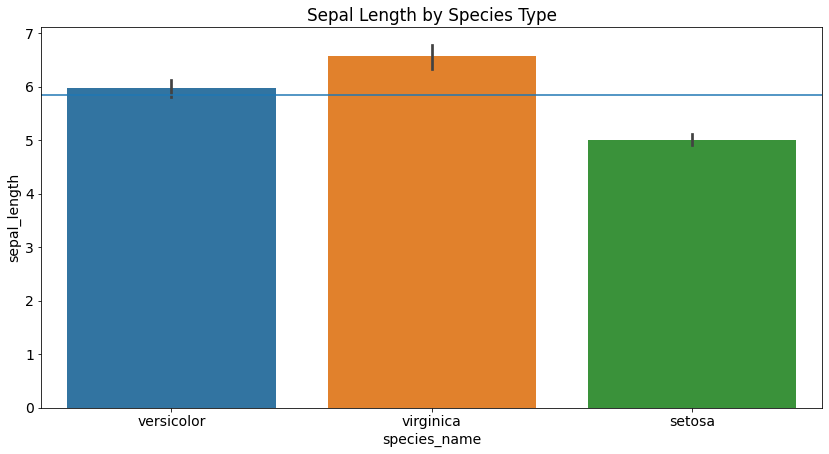

In [73]:
sns.barplot(data=train, x='species_name', y='sepal_length')
plt.axhline(y=train.sepal_length.mean())
plt.title('Sepal Length by Species Type')
plt.show()

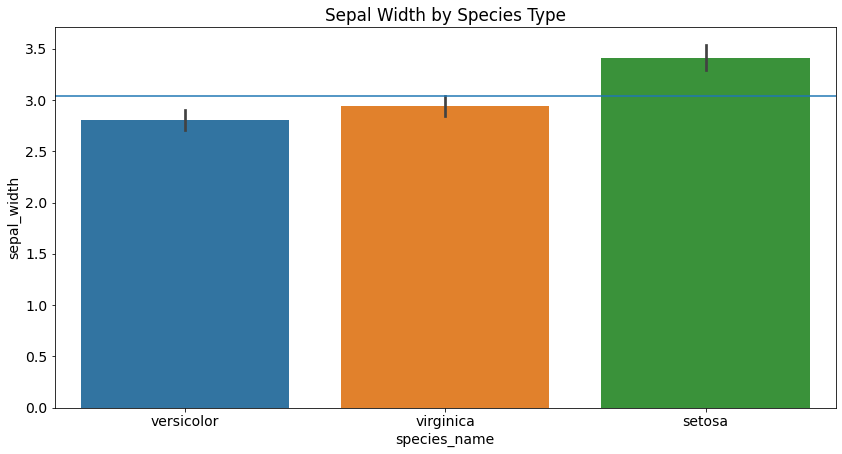

In [74]:
sns.barplot(data=train, x='species_name', y='sepal_width')
plt.axhline(y=train.sepal_width.mean())
plt.title('Sepal Width by Species Type')
plt.show()

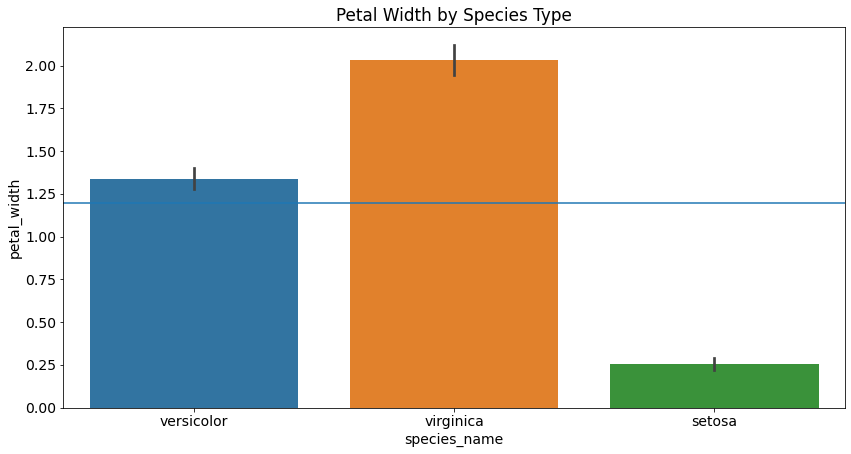

In [75]:
sns.barplot(data=train, x='species_name', y='petal_width')
plt.axhline(y=train.petal_width.mean())
plt.title('Petal Width by Species Type')
plt.show()

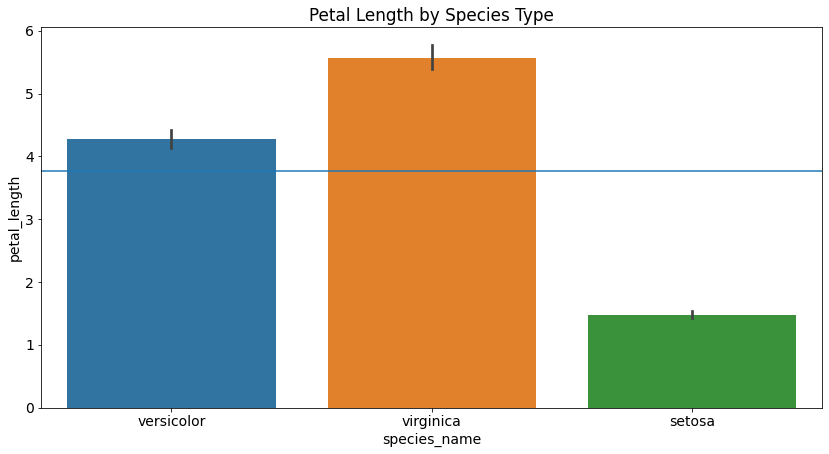

In [76]:
sns.barplot(data=train, x='species_name', y='petal_length')
plt.axhline(y=train.petal_length.mean())
plt.title('Petal Length by Species Type')
plt.show()

#### 3b. For each measurement type, compute the descriptive statistics for each species

In [77]:
train[train.species_name=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,32.000000,32.000000,32.000000,32.000000
mean,6.571875,2.940625,5.571875,2.031250
std,0.644698,0.290560,0.572056,0.276426
min,4.900000,2.500000,4.500000,1.400000
25%,6.275000,2.700000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.975000,3.200000,5.925000,2.300000
max,7.700000,3.600000,6.900000,2.500000


In [78]:
train[train.species_name=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,32.000000,32.000000,32.000000,32.000000
mean,6.571875,2.940625,5.571875,2.031250
std,0.644698,0.290560,0.572056,0.276426
min,4.900000,2.500000,4.500000,1.400000
25%,6.275000,2.700000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.975000,3.200000,5.925000,2.300000
max,7.700000,3.600000,6.900000,2.500000


In [79]:
train[train.species_name=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,41.000000,41.000000,41.000000,41.000000
mean,5.970732,2.802439,4.273171,1.334146
std,0.538630,0.321316,0.480637,0.208098
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,6.000000,2.900000,4.400000,1.300000
75%,6.400000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [80]:
train[train.species_name=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,34.000000,34.000000,34.000000,34.000000
mean,5.011765,3.414706,1.482353,0.252941
std,0.298242,0.361086,0.166006,0.105127
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.175000,3.700000,1.600000,0.300000
max,5.700000,4.100000,1.900000,0.600000


#### 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.¶


In [81]:
#this is mean petal width for virginica
train[train.species_name=='virginica'].petal_width.mean()

2.031249999999999

In [82]:
#this is mean petal width for versiolor
train[train.species_name=='versicolor'].petal_width.mean()

1.3341463414634145

In [83]:
#MannWhitney for petal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].petal_width, train[train.species_name=='versicolor'].petal_width)
s,p

(25.0, 9.786192636318041e-13)

In [84]:
#MannWhitney for petal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].petal_length, train[train.species_name=='versicolor'].petal_length)
s,p

(27.5, 1.3591439783594362e-12)

In [85]:
#MannWhitney for sepal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].sepal_width, train[train.species_name=='versicolor'].sepal_width)
s,p

(512.5, 0.05485122895288755)

In [86]:
#MannWhitney for sepal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].sepal_length, train[train.species_name=='versicolor'].sepal_length)
s,p

(306.5, 5.098353396455423e-05)

In [87]:
# Takeaways
## # sepal width is the least different. so it would not be a good measurement type to use

### Multivariate Stats
4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.¶


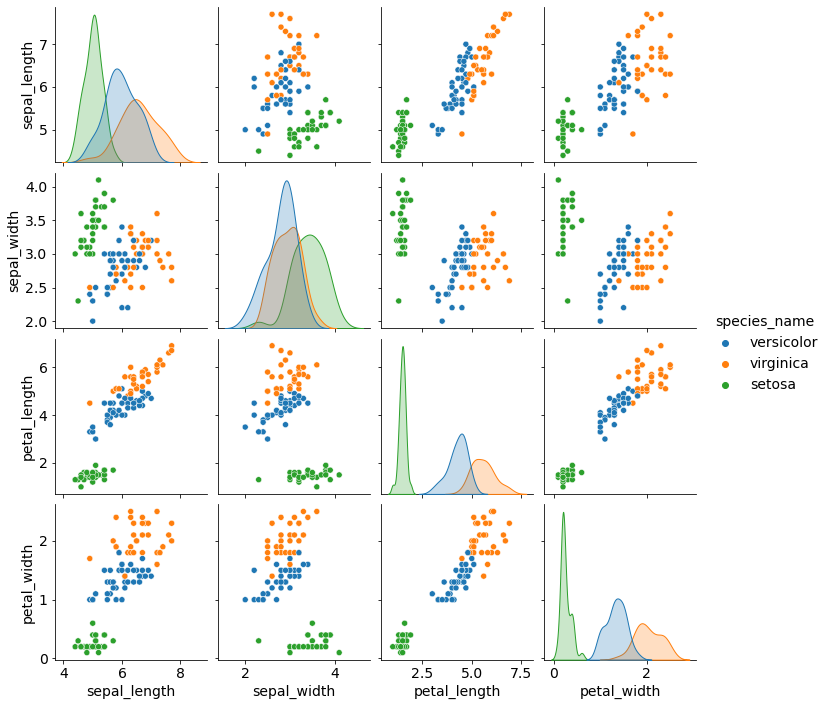

In [88]:
sns.pairplot(data=train, hue='species_name')

4b. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.¶


In [89]:
melted_train=pd.melt(train, id_vars='species_name')
melted_train.head()

,species_name,variable,value
0,versicolor,sepal_length,5.8
1,virginica,sepal_length,7.6
2,versicolor,sepal_length,6.1
3,versicolor,sepal_length,7.0
4,versicolor,sepal_length,5.1


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


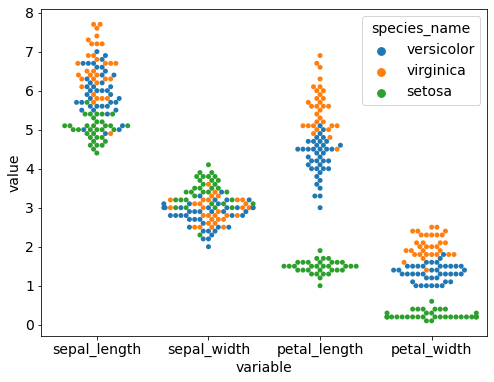

In [90]:
plt.figure(figsize=(8,6))
p= sns.swarmplot(
x='variable',
y='value',
hue='species_name',
data=melted_train)

#### 4c. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).¶


In [92]:
#create new column that is train
train['petal_area'] = train.petal_length * train.petal_width

<ipython-input-92-39dcc10039a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['petal_area'] = train.petal_length * train.petal_width


In [93]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area
67,5.8,2.7,4.1,1.0,versicolor,4.10
105,7.6,3.0,6.6,2.1,virginica,13.86
91,6.1,3.0,4.6,1.4,versicolor,6.44
50,7.0,3.2,4.7,1.4,versicolor,6.58
98,5.1,2.5,3.0,1.1,versicolor,3.30


#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [95]:
#create columns for sepal are and petal area
train['sepal_area'] = train.sepal_length * train.sepal_width
#train['petal_area'] = train.petal_length * train.petal_width <-- this row did not run because I already create it above

<ipython-input-95-bcd099c1e0d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sepal_area'] = train.sepal_length * train.sepal_width


In [96]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area,sepal_area
67,5.8,2.7,4.1,1.0,versicolor,4.10,15.66
105,7.6,3.0,6.6,2.1,virginica,13.86,22.80
91,6.1,3.0,4.6,1.4,versicolor,6.44,18.30
50,7.0,3.2,4.7,1.4,versicolor,6.58,22.40
98,5.1,2.5,3.0,1.1,versicolor,3.30,12.75


In [97]:
#create the combos of subplots you want to see for 'for loop' in later code
combos = [
    ('sepal_length', 'sepal_width'),
     ('petal_length', 'petal_width'),
     ('sepal_area', 'petal_area'),
     ('sepal_length', 'petal_length')
]

In [98]:
#this groups species and returns the total sepal area for that species
train.groupby('species_name')['sepal_area'].sum()

species_name
setosa        584.32
versicolor    690.11
virginica     620.28
Name: sepal_area, dtype: float64

In [99]:
xtest= combos[0][0]
ytest= combos [0][1]

#define the function for scatter plot
def scatter_species(x,y):
    for species_name, subset in train.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label= species_name)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

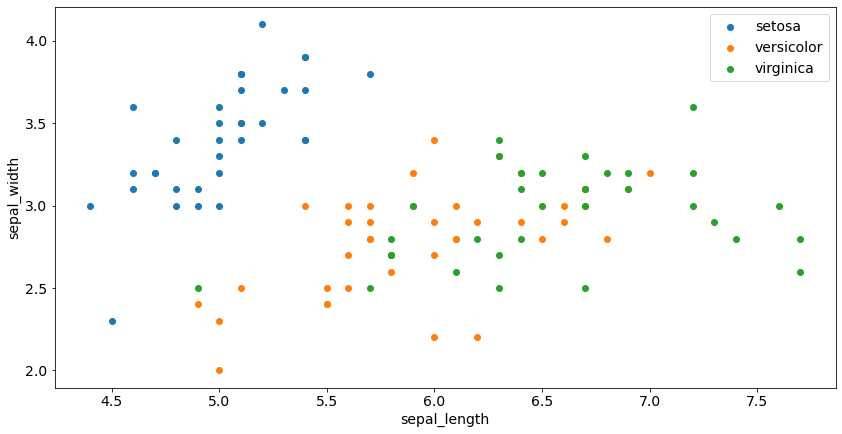

In [100]:
scatter_species(xtest,ytest)

In [101]:
#create with a loop
for i, pair in enumerate(combos):
    print(i)
    print(pair)

0
('sepal_length', 'sepal_width')
1
('petal_length', 'petal_width')
2
('sepal_area', 'petal_area')
3
('sepal_length', 'petal_length')


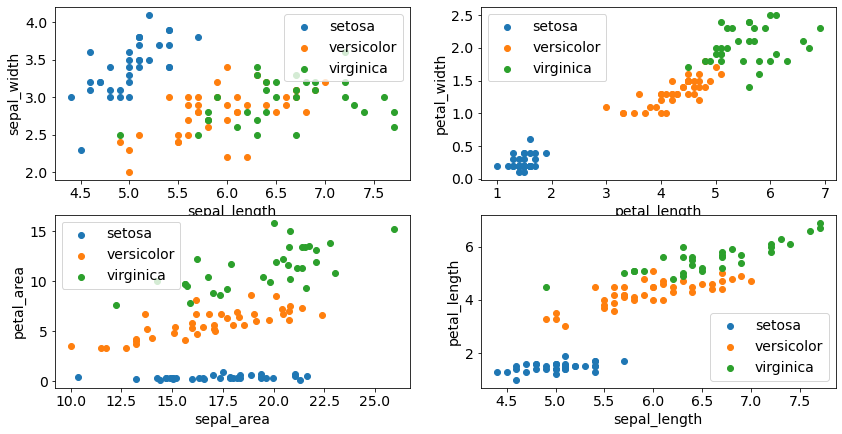

In [102]:
#create subplot manually
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])

plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])

plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])

plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])

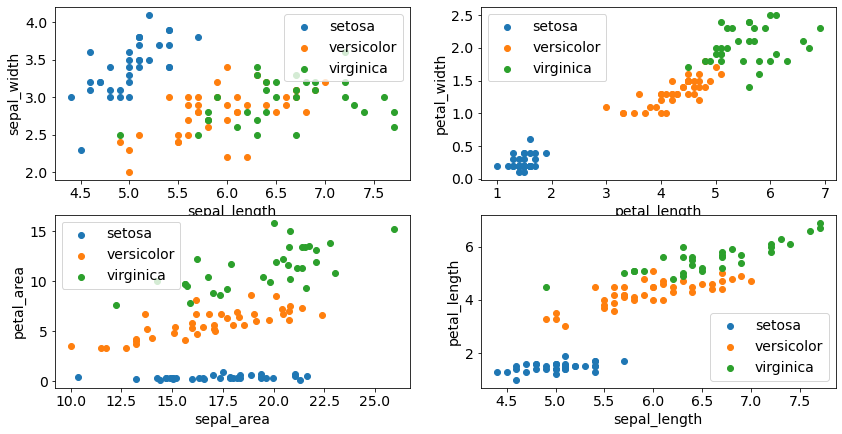

In [103]:
#create the same subplots using a 'for loop' instead
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0],pair[1])

#### 4. Create a heatmap of each variable layering correlation coefficient on top.

<AxesSubplot:>

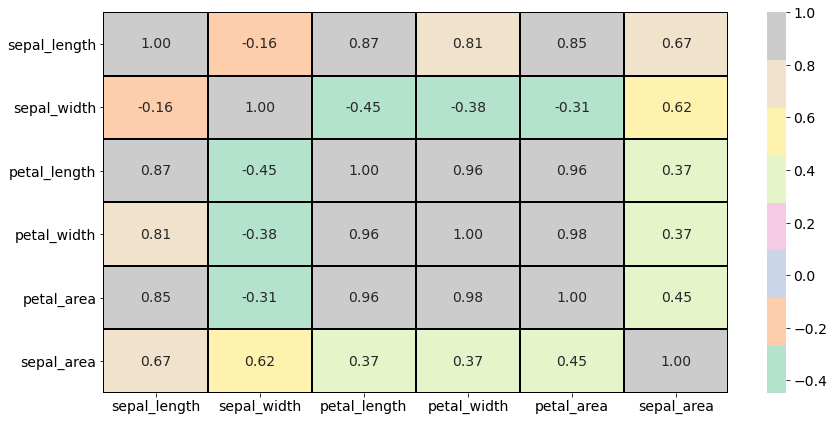

In [105]:
sns.heatmap(train.corr(), cmap= 'Pastel2',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')

#### 5. Create a scatter matrix visualizing the interaction of each variable.

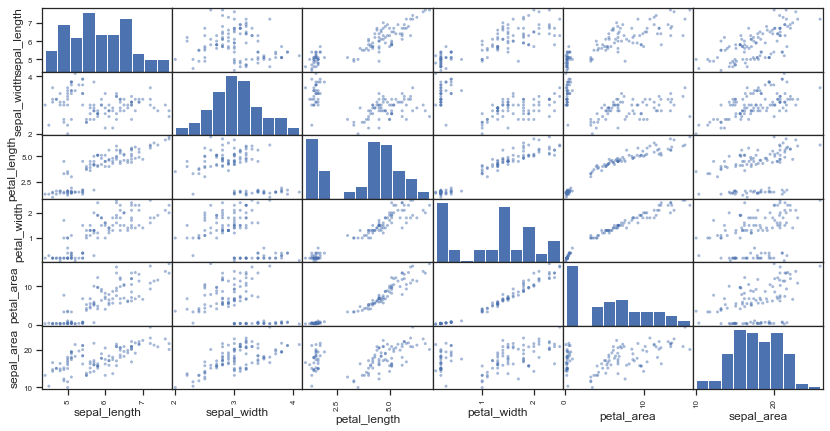

In [108]:
pd.plotting.scatter_matrix(train)
plt.show()

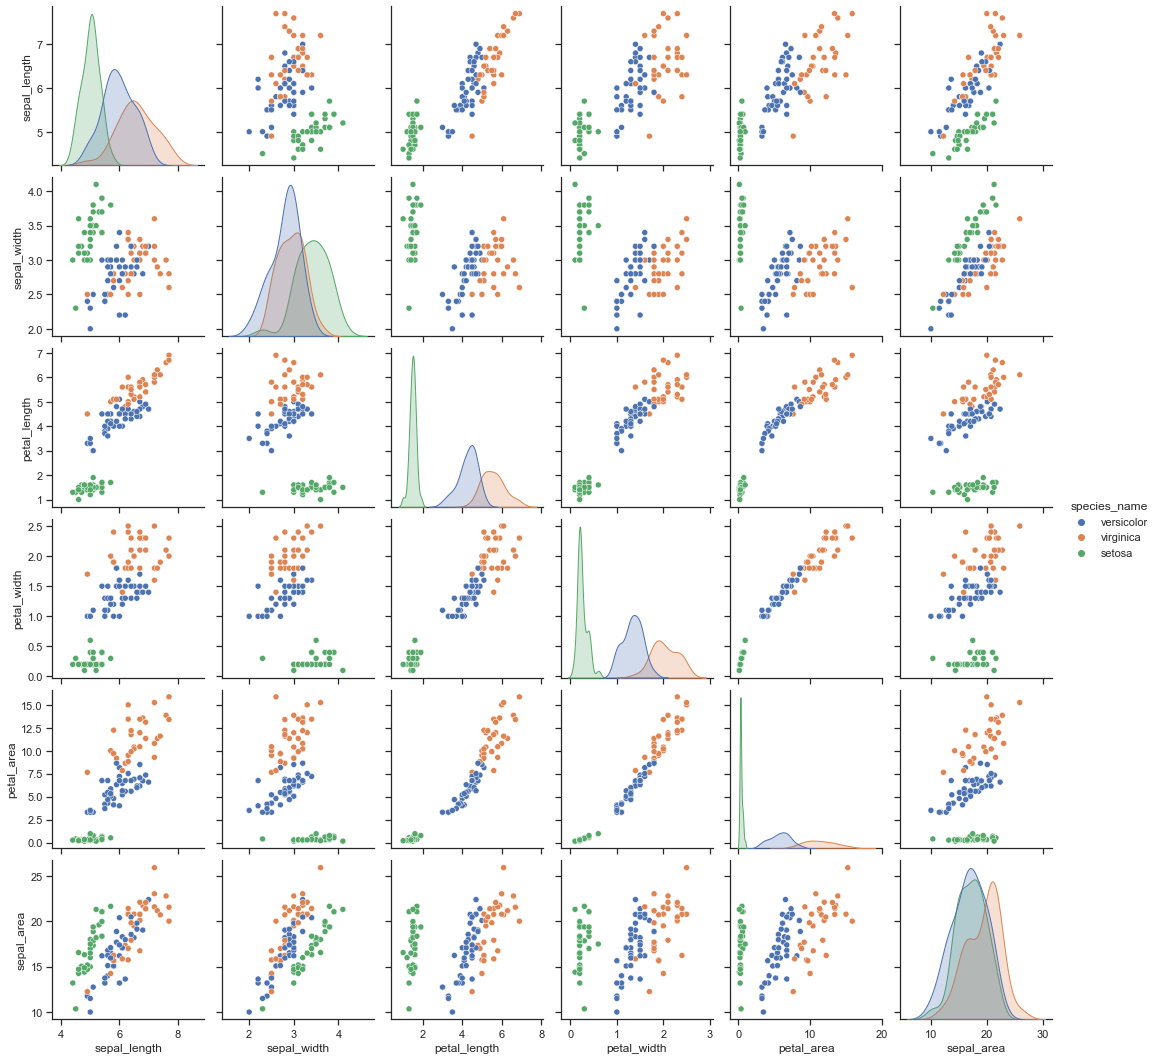

In [109]:
#this is a pairplot
sns.pairplot(data=train, hue='species_name')
plt.show()

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

##### Hypothesis

- alpha = .05
- $H_o$: Sepal length is the same 
- $H_a$: Sepal length is significantly different


###### - What is your takeaway from this statistical testing?

In [110]:
virginica= train[train['species_name'] == 'virginica']
versicolor= train[train['species_name'] == 'versicolor']

In [111]:
virginica.describe()['sepal_length']

count    32.000000
mean      6.571875
std       0.644698
min       4.900000
25%       6.275000
50%       6.500000
75%       6.975000
max       7.700000
Name: sepal_length, dtype: float64

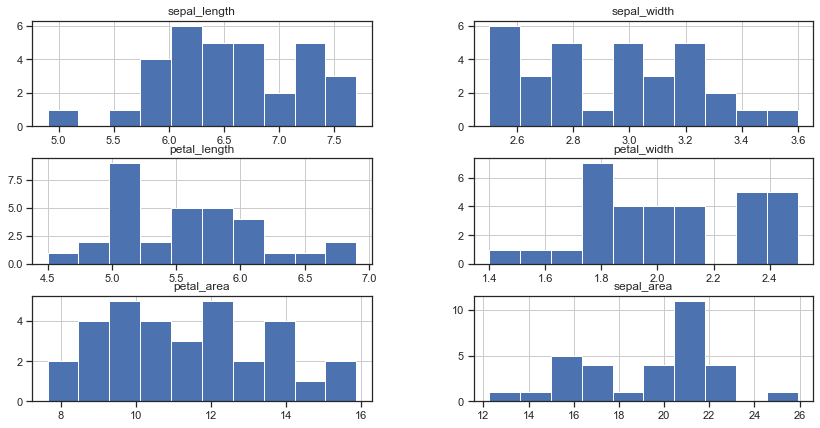

In [112]:
virginica.hist()
plt.show()

In [113]:
versicolor.describe()['sepal_length']

count    41.000000
mean      5.970732
std       0.538630
min       4.900000
25%       5.600000
50%       6.000000
75%       6.400000
max       7.000000
Name: sepal_length, dtype: float64

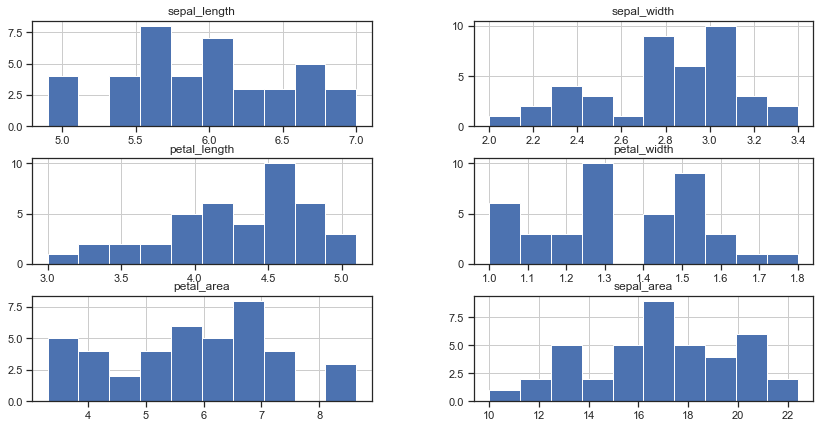

In [114]:
versicolor.hist()
plt.show()

In [115]:
#this will give you the variance of versicolor, virginica
versicolor.describe()['sepal_length']['std']**2, virginica.describe()['sepal_length']['std']**2

(0.290121951219512, 0.4156350806451613)

In [116]:
tstat,p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length, equal_var=False)

In [117]:
tstat, p

(4.2438616959529165, 7.715334994797678e-05)

In [118]:
p < 0.05

True